<a href="https://colab.research.google.com/github/warwavn/AI-SUT2025/blob/main/Day%209%20Deep%20Learning%20Introduction/D9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.11.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.11.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.11.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/AI_SUT_2025_Workspace/manufacturing - manufacturing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


<Axes: >

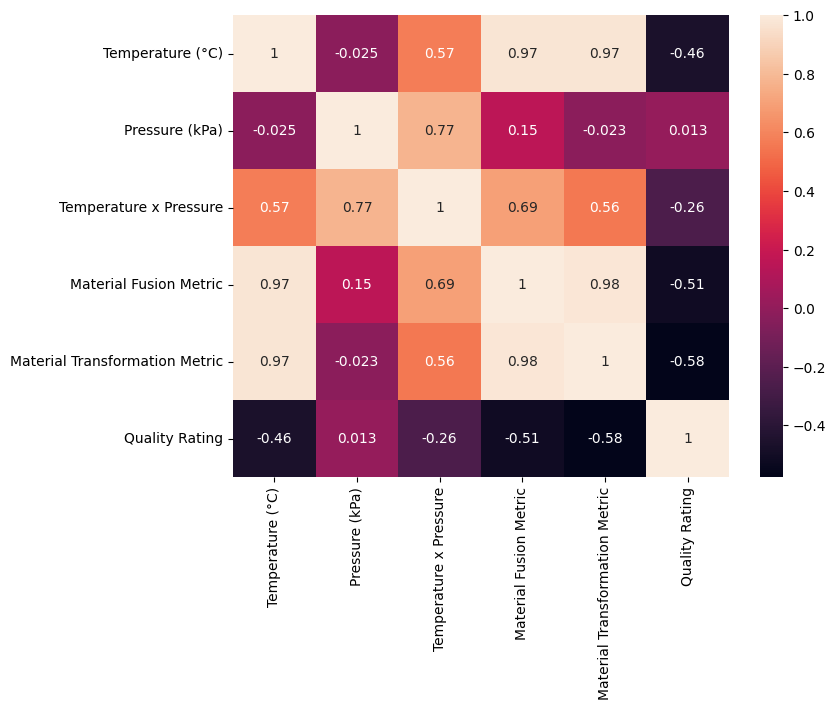

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[df.select_dtypes(include=['int64','float64']).columns.tolist()].corr(), annot=True)

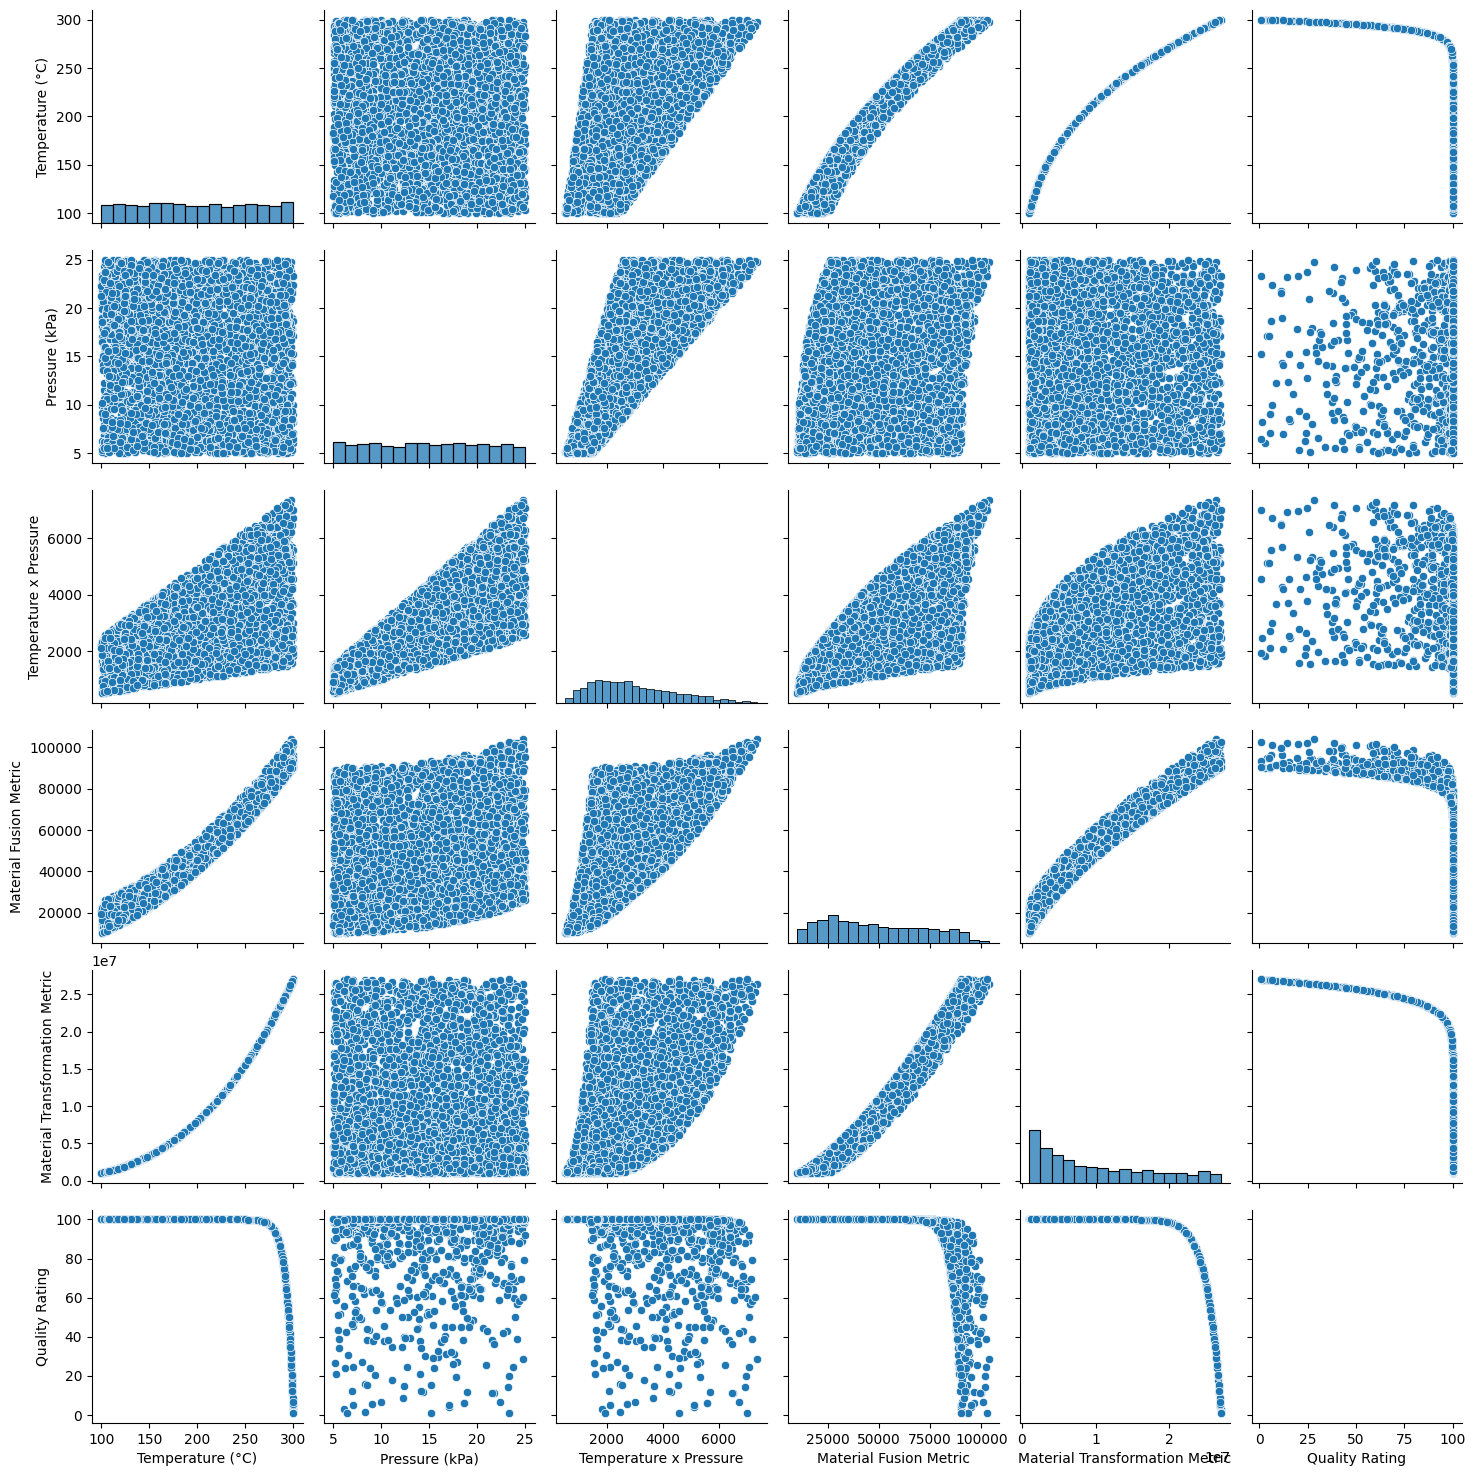

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
x = df.drop('Quality Rating',axis=1).values
y = df['Quality Rating'].values

In [52]:
y

array([ 99.99997052,  99.98570341,  99.99975761, ...,  99.98931825,
        99.99997451, 100.        ])

In [34]:
scaler = MinMaxScaler()

# num_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features)
x_scaled = scaler.fit_transform(x)
# y_sc = pd.DataFrame(scaler.fit_transform(y), columns=y.columns.tolist())
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled , y_scaled , test_size = 0.2)

In [39]:
x_train.shape

(3165, 5)

In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu',input_shape=[5]))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,251 (32.23 KB)

 Trainable params: 8,251 (32.23 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')

hist = model.fit(x_train,y_train, epochs = 100, batch_size = 10, validation_split=0.2)

Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1057e-04 - val_loss: 9.5819e-05
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0147e-05 - val_loss: 5.6610e-05
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.7741e-05 - val_loss: 7.5805e-05
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.5479e-05 - val_loss: 5.9492e-05
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4683e-05 - val_loss: 7.2925e-05
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9664e-05 - val_loss: 5.4769e-05
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8678e-05 - val_loss: 6.2878e-05
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5292e-05 - val_loss: 5.4934e-05
Epoch 9/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1652e-04 - val_loss: 5.9587e-05
Epoch 10/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8203e-05 - val_loss: 3.5172e-04
Epoch 11/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

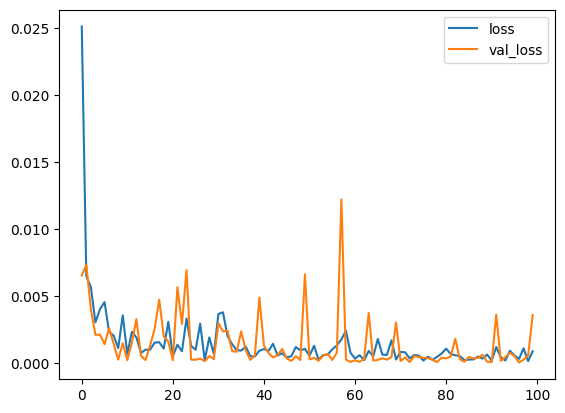

In [47]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


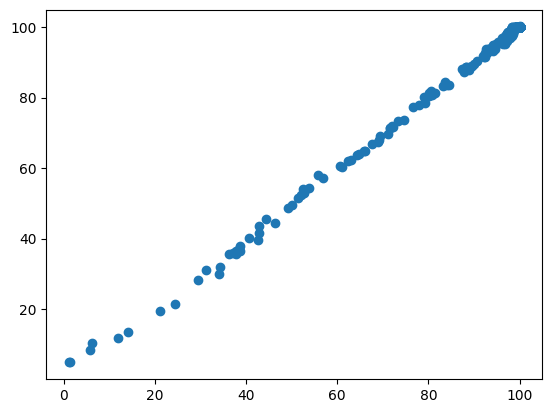

In [56]:
y_test_pred = model.predict(x_test)
y_test_pred_unscaled = scaler.inverse_transform(y_test_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

plt.scatter(y_test_unscaled,y_test_pred_unscaled)